# Delving into more complex models

## Imports 

In [2]:
# System imports
import os
import sys
from pathlib import Path
# Plotting imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.pyplot import imread
import seaborn as sn
# Pytorch imports
import torch 
import torch.nn as nn
import torch.nn.functional as F
# Vision imports
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import WeightedRandomSampler

# Random
import random
# TQDM
import tqdm



os.chdir('..') 
print(os.getcwd())

from Scripts.data_setup import create_dataloaders
from Scripts.engine import *
# setting up device agnostics
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Setting number of works and directories for data
NUM_WORKERS = os.cpu_count()
TRAIN_DIR = "Data/train/"
TEST_DIR = "Data/test/"
DATA_DIR = "Data"




TRAINING_MODEL_NUMBER = 0

c:\Computational\Learning-Machine-Learning\PneumoniaCVProblem-1


c:\Users\jackg\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_augmentation_transform = data_transforms_train = transforms.Compose([
        transforms.RandomRotation(20),  # Randomly rotate the image within a range of (-20, 20) degrees
        transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with 50% probability
        transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),  # Randomly crop the image and resize it
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Randomly change the brightness, contrast, saturation, and hue
        transforms.RandomApply([transforms.RandomAffine(0, translate=(0.1, 0.1))], p=0.5),  # Randomly apply affine transformations with translation
        transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.2)], p=0.5),  # Randomly apply perspective transformations
        transforms.Resize(size=(256 ,256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])


test_data_transform = transforms.Compose([
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

## Convolutional neural networks

So far we have only looked at simple feedward neural networks, we will now look at some CNN models - these will allow the network to capture some structure of the images.

As CNNs can easily cope with higher dimensional images we will also upsize to 256x256 image size.

## Model 5

Our first CNN will consist of 1 convolition layer of 16 filters, a max pool of 2x2 and then into a FFNN of 512 dense.

In [4]:
class CNNmodelv1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 128 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [5]:
if TRAINING_MODEL_NUMBER == 5:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv5 = CNNmodelv1()
    modelv5.to(DEVICE)


    loss_func_5 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv5,
                loss_func_5,
                epoches = 10
                )

    evalutation_model(modelv5, test_data, loss_func_5)


As we see our 5th model got 89% accuracy and 92% f1 score - a massive improvement in the right direction.

## Model 6

Continuing our upwards trend we will now try a CNN with an additional convolution layer, so now we have 16 filters into 32 filters of 5x5x5, this leaves the size of the image after the 2 convolutions at 32 * 52 * 52.

In [6]:
class CNNmodelv2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 5, padding =2
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [7]:
if TRAINING_MODEL_NUMBER == 6:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv6 = CNNmodelv2()
    modelv6.to(DEVICE)


    loss_func_6 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv6,
                loss_func_6,
                epoches = 10
                )
    

    evalutation_model(modelv6, test_data, loss_func_6)



* Accuracy - 87%
* F1 score - 90%

## Model 7 - succesively decreasing filter sizes instead.

In [8]:
class CNNmodelv3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 16, 5, padding =2
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

We will now try decrease the filter size while increasing the kernal size instead, the last one took forever to train and didn't seem to do any better then just the simple one convolutional layer.

In [9]:
if TRAINING_MODEL_NUMBER == 7:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv7 = CNNmodelv3()
    modelv7.to(DEVICE)


    loss_func_7 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv7,
                loss_func_7,
                epoches = 10
                )
    
    evalutation_model(modelv7, test_data, loss_func_7)


Model didn't seem to perform well at all and trained at lot slower then other models.
* Accuracy - 84% 
* F1 score - 88%

## Model 8 

Returning to a more simple mode of 16(3) -> 32(3) -> Fc

In [10]:
class CNNmodelv4(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 64 * 64, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [11]:
if TRAINING_MODEL_NUMBER == 8:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv8 = CNNmodelv4()
    modelv8.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv8,
                loss_func_8,
                epoches = 10
                )
    
    evalutation_model(modelv8, test_data, loss_func_8)


Good improvement 
* Accuracy - 89%
* F1Score - 91%

## Model 9

Continuing on from the model above we will now use a model with 3 convolutional layers all having kernals of size 3.

In [12]:
class CNNmodelv5(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

In [13]:
if TRAINING_MODEL_NUMBER == 9:


    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv9 = CNNmodelv5()
    modelv9.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv9,
                loss_func_8,
                epoches = 10
                )
    evalutation_model(modelv9, test_data, loss_func_8)



* Accuracy - 88%
* F1SCore - 91%

## Balancing dataset - Model 10

We will now use a weighted sampler to give a better balance between our 2 classes, as currently the non-pnuomnia class is massively under represented. This should hopefully improve model performance.

In [14]:
if TRAINING_MODEL_NUMBER == 10:  # Labels of all samples in the dataset

    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS, sampler = True)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv10 = CNNmodelv5()
    modelv10.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv10,
                loss_func_8,
                epoches = 10
                )

    evalutation_model(modelv10, test_data, loss_func_8)


Small improvement with sampling, will introduce it into every model from now. 
* Accuracy - 89% 
* F1score - 89%

## Model 11 - Above with 30 epoches

Sampling show improvement when training, however clearly learned slower - so we will increase the training time to see how much more performance we can get out of it.

In [15]:
if TRAINING_MODEL_NUMBER == 11:  # Labels of all samples in the dataset

    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS, sampler = True)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv11 = CNNmodelv5()
    modelv11.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv11,
                loss_func_8,
                epoches = 30
                )

    evalutation_model(modelv11, test_data, loss_func_8)


Performed Slighty better
* Accuracy - 90%
* F1 score - 92%

## Model 12 - Drop Out layers

We will now introduce drop out layers onto the our 2 linear layers.

In [18]:
class CNNmodelv6(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding =1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding =1
            ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, 2)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.conv1(x)

cuda
Epoch: 1 | train_loss: 0.5175 | train_acc: 0.7717 | test_loss: 0.5925 | test_acc: 0.7354
Epoch: 2 | train_loss: 0.2787 | train_acc: 0.8904 | test_loss: 0.3681 | test_acc: 0.8521
Epoch: 3 | train_loss: 0.2327 | train_acc: 0.9160 | test_loss: 0.3464 | test_acc: 0.8260
Epoch: 4 | train_loss: 0.2227 | train_acc: 0.9135 | test_loss: 0.3368 | test_acc: 0.8651
Epoch: 5 | train_loss: 0.1999 | train_acc: 0.9198 | test_loss: 0.3928 | test_acc: 0.8318
Epoch: 6 | train_loss: 0.1956 | train_acc: 0.9253 | test_loss: 0.3242 | test_acc: 0.8755
Epoch: 7 | train_loss: 0.1838 | train_acc: 0.9272 | test_loss: 0.3134 | test_acc: 0.8802
Epoch: 8 | train_loss: 0.1719 | train_acc: 0.9417 | test_loss: 0.3131 | test_acc: 0.8911
Epoch: 9 | train_loss: 0.1654 | train_acc: 0.9404 | test_loss: 0.3071 | test_acc: 0.8734
Epoch: 10 | train_loss: 0.1624 | train_acc: 0.9419 | test_loss: 0.3223 | test_acc: 0.8672
Epoch: 11 | train_loss: 0.1554 | train_acc: 0.9392 | test_loss: 0.3022 | test_acc: 0.8776
Epoch: 12 | tr

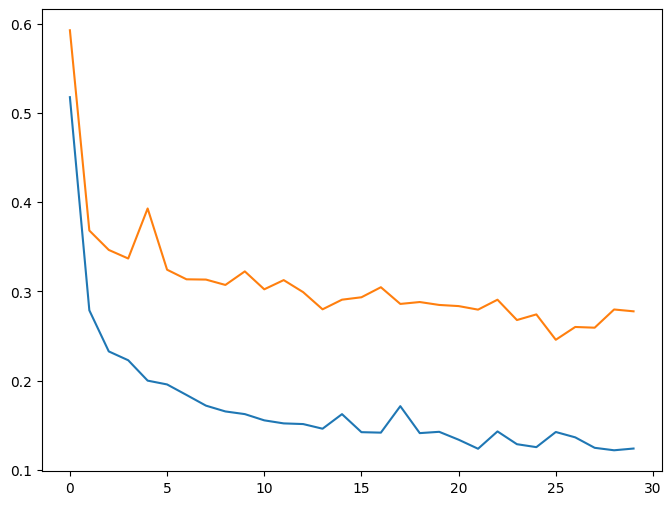

0.9162303664921466


In [19]:
if TRAINING_MODEL_NUMBER == 12:  # Labels of all samples in the dataset

    train_data, _ = create_dataloaders(TRAIN_DIR, TEST_DIR, data_augmentation_transform, 64, NUM_WORKERS, sampler = True)
    _ , test_data = create_dataloaders(TRAIN_DIR, TEST_DIR, test_data_transform, 64, NUM_WORKERS)
    print(DEVICE)
    modelv12 = CNNmodelv6()
    modelv12.to(DEVICE)


    loss_func_8 = torch.nn.CrossEntropyLoss()
    train_model(train_data,
                test_data,                              
                modelv12,
                loss_func_8,
                epoches = 30
                )

    evalutation_model(modelv12, test_data, loss_func_8)


Slight improvements using drop out layers - could possibely tune the drop out probabilites on the layers aswell and push maybe 1-2$ more.

* Accuracy - 91%
* F1score - 92%